In [1]:
from DatasetHandler.BiwiBrowser import *
from LSTM_VGG16.LSTM_VGG16Helper import *
%matplotlib inline

Using TensorFlow backend.


In [2]:
output_begin = 4
num_outputs = 1

In [14]:
timesteps = 16 # TimeseriesGenerator Handles overlapping
in_epochs = 1
out_epochs = 2
train_batch_size = 1
test_batch_size = 1

In [15]:
subjectList = [1, 2, 3, 4] #, 5, 7, 8, 11, 12, 14 except [6, 13, 10, ]
testSubjects = [9]

In [16]:
num_datasets = len(subjectList)

In [17]:
def getFinalModel(num_outputs = num_outputs):
    inp = (224, 224, 3) # BIWI_Frame_Shape
    vgg_model = VGG16(weights='imagenet', input_shape = inp, include_top=False) #BIWI_Frame_Shape
    """"
    nb_pretrained_layers = len(vgg_model.layers)
    #print(nb_pretrained_layers)
    vgg_model.layers.pop()
    vgg_model.output_layers = [vgg_model.layers[-1]]#
    vgg_model.layers[-1].outbound_nodes = []#
    vgg_model.outputs = [vgg_model.layers[-1].output]#
    nb_pretrained_layers = len(vgg_model.layers)
    print(nb_pretrained_layers)
    """
    for layer in vgg_model.layers: 
        layer.trainable = False#
    #vgg_model.summary()
    
    rnn = Sequential()
    rnn.add(TimeDistributed(vgg_model, input_shape=(timesteps, inp[0], inp[1], inp[2]), name = 'tdVGG16')) 
    rnn.add(TimeDistributed(Flatten()))#
    
   # rnn.add(TimeDistributed(Dense(4096, activation='relu'), name = 'fc1024')), activation='relu'
   # rnn.add(TimeDistributed(Dense(4096, activation='relu'), name = 'fc104'))    
   # rnn.add(TimeDistributed(Dropout(0.25)))
   # rnn.add(TimeDistributed(Dense(1024, activation='relu'), name = 'fc10'))
   # rnn.add(TimeDistributed(Dropout(0.25)))

    rnn.add(LSTM(128, dropout=0.25, recurrent_dropout=0.25))
   # rnn.add(Flatten())
    rnn.add(Dense(num_outputs))
    #print(len(rnn.layers))
    for layer in rnn.layers[:1]:#
        layer.trainable = False#
    adam = optimizers.Adam(lr=0.0001)
    rnn.compile(optimizer=adam, loss='mean_squared_error', metrics=['mae'])
    return rnn

In [18]:
keras.backend.clear_session()#
full_model = getFinalModel(num_outputs = num_outputs)

In [19]:
#full_model.summary()

In [20]:
full_model = trainImageModelForEpochs(full_model, out_epochs, subjectList, testSubjects, timesteps, False, output_begin, num_outputs, batch_size = train_batch_size, in_epochs = in_epochs)

All frames and annotations from 4 datasets have been read by 2019-01-10 20:30:23.963949
1. set (Dataset 3) being trained for epoch 1!
Epoch 1/1
714/714 [==============================] - 116s 162ms/step - loss: 0.1034 - mean_absolute_error: 0.2514
2. set (Dataset 1) being trained for epoch 1!
Epoch 1/1
482/482 [==============================] - 75s 156ms/step - loss: 0.1113 - mean_absolute_error: 0.2817
3. set (Dataset 4) being trained for epoch 1!
Epoch 1/1
728/728 [==============================] - 113s 156ms/step - loss: 0.1100 - mean_absolute_error: 0.2669
4. set (Dataset 2) being trained for epoch 1!
Epoch 1/1
495/495 [==============================] - 77s 156ms/step - loss: 0.0931 - mean_absolute_error: 0.2396
Epoch 1 completed!
All frames and annotations from 4 datasets have been read by 2019-01-10 20:37:30.728875
1. set (Dataset 4) being trained for epoch 2!
Epoch 1/1
728/728 [==============================] - 113s 155ms/step - loss: 0.0406 - mean_absolute_error: 0.1696
2. set 

In [21]:
test_generators, test_labelSets = getTestBiwiForImageModel(testSubjects, timesteps, False, output_begin, num_outputs, batch_size = test_batch_size)
test_gen, test_labels = test_generators[0], test_labelSets[0] #[1]

All frames and annotations from 1 datasets have been read by 2019-01-10 20:44:26.725580


In [22]:
predictions = full_model.predict_generator(test_gen, verbose = 1)
#predictions = full_model.predict(test_gen[0][0], verbose = 1)
output1 = numpy.concatenate((test_labels[timesteps:, :1], predictions[:, :1]), axis=1)

866/866 [==============================] - 104s 120ms/step


In [23]:
print([i[0] for i in predictions[:10]])

[-0.3440262, -0.31877273, -0.34065068, -0.32625192, -0.33515722, -0.33543277, -0.3293311, -0.3317098, -0.3317598, -0.34163773]


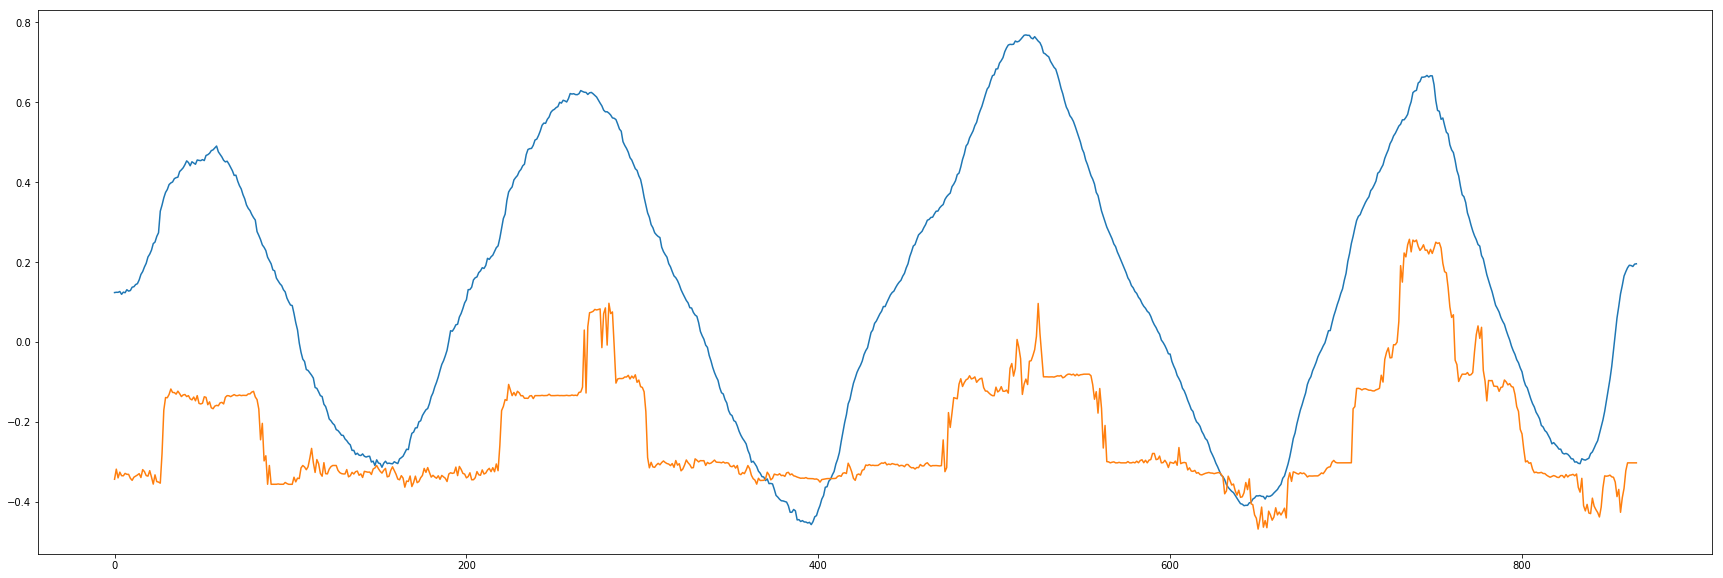

In [24]:
plt.figure(figsize=(30,10))
plt.plot(output1)

In [ ]:
exit()